In [134]:

import pandas as pd  # MANIPULAR DADOS
import numpy as np # MANIPULAR CALCULOS NÚMERICOS
import matplotlib.pyplot as plt # MANIPULAR GRÁFICO
import os # MANIPULAR PASTAS
import warnings # MANIPULAR MENSAGENS DE AVISO DURANTE A EXECUÇÃO DO PROGRAMA 




## IMPORTANDO OS DADOS

clientes = pd.read_csv('olist_customers_dataset.csv')
vendedores = pd.read_csv('olist_sellers_dataset.csv')
geolocalizaçao = pd.read_csv('olist_geolocation_dataset.csv')
itens_ordem = pd.read_csv('olist_order_items_dataset.csv')
pedidos_pagamentos = pd.read_csv('olist_order_payments_dataset.csv')
comentarios_pedido = pd.read_csv('olist_order_reviews_dataset.csv')
pedidos = pd.read_csv('olist_orders_dataset.csv')
produtos = pd.read_csv('olist_products_dataset.csv')
nome_categoria_produto = pd.read_csv('product_category_name_translation.csv')




## Mesclando conjuntos de dados:

### Mesclando essas tabelas:

* clientes
* vendedores
* geolocalização 
* itens_ordem
* pedidos_pagamentos
* comentários_pedido
* pedidos
* produtos
* nome_categoria_produto


In [135]:


#MESCLANDO CONJUNTOS DE DADOS 


pedido_itens_produtos = pd.merge(itens_ordem,produtos,on='product_id',how='outer')
pedidos_itens_produtos_vendedores = pd.merge(pedido_itens_produtos,vendedores, on='seller_id',how='outer')
dois_pedidos_items_produtos_vendedores = pd.merge(pedidos_itens_produtos_vendedores,pedidos,on='order_id',how='outer')
dois_pedidos_items_produtos_vendedores_clientes = pd.merge(dois_pedidos_items_produtos_vendedores,clientes,on='customer_id',how='outer')
dois_pedidos_items_produtos_vendedores_clientes_comentario = pd.merge(dois_pedidos_items_produtos_vendedores_clientes,comentarios_pedido,on='order_id',how='outer')
dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos = pd.merge(dois_pedidos_items_produtos_vendedores_clientes_comentario,pedidos_pagamentos,on='order_id',how='outer')

dois_pedidos_items_produtos_vendedores_clientes_comentario_pagamentos_categoria = dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos.merge(nome_categoria_produto, on='product_category_name', how='left')
nome_categoria_produto = pd.read_csv('product_category_name_translation.csv')
dois_pedidos_items_produtos_vendedores_clientes_comentario_pagamentos_categoria[''] = dois_pedidos_items_produtos_vendedores_clientes_comentario_pagamentos_categoria['product_category_name']
nome_categoria_produto = pd.read_csv('product_category_name_translation.csv')
dois_pedidos_items_produtos_vendedores_clientes_comentario_pagamentos_categoria.drop([''], axis=1, inplace=True)

In [136]:
# MESCLANDO O CONJUNTO DE DADOS DE GEOLOCALIZAÇÃO COM O DATAFRAME.

comentarios_pedido.isnull().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [137]:
# ENCONTRANDO OS NÚMEROS DE LINHAS REDUNDANTES

geolocalizaçao.duplicated().sum 



<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1000158    False
1000159     True
1000160     True
1000161    False
1000162     True
Length: 1000163, dtype: bool>

In [138]:
# REMOVENDO LINHAS REDUNDANTES

geolocalizaçao = geolocalizaçao.drop_duplicates()

In [139]:
# CALCULA MÉDIA LAT. E MÉDIA LON. COM BASE NA COLUNA DO ARQUIVO olis_geolocation_dataset.csv

media_lat = geolocalizaçao.groupby('geolocation_zip_code_prefix')['geolocation_lat'].mean().reset_index()
media_long = geolocalizaçao.groupby('geolocation_zip_code_prefix')['geolocation_lng'].mean().reset_index()

media_lat.rename(columns={'geolocation_lat': 'media_lat'}, inplace=True)
media_long.rename(columns={'geolocation_lng': 'media_long'}, inplace=True)

geolocalizaçao_necessaria = pd.merge(media_lat, media_long, on='geolocation_zip_code_prefix')

In [140]:
display()

In [141]:
# ADICIONANDO vendedor_lat e vendedor_long AO DATAFRAME.

dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos_categoria_vendedorloc  = pd.merge(dois_pedidos_items_produtos_vendedores_clientes_comentario_pagamentos_categoria, geolocalizaçao_necessaria, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos_categoria_vendedorloc.rename(columns={
    'media_lat' : 'seller_lat',
    'media_long' : 'seller_lng'
}, inplace=True)

dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos_categoria_vendedorloc.drop(['geolocation_zip_code_prefix'], axis=1, inplace=True)

In [142]:
# ADICIONADO cliente_lar E cliente_long AO DATAFRAME

dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos_categoria_clienteloc = pd.merge(dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos_categoria_vendedorloc, geolocalizaçao_necessaria, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos_categoria_clienteloc.rename(columns={
    'media_lat' : 'customer_lat',
    'media_long' : 'customer_lng'
}, inplace=True)

dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos_categoria_clienteloc.drop(['geolocation_zip_code_prefix'], axis=1, inplace=True)


In [143]:
# RENOMEANDO O DATAFRAME, ONDE USAREI df PARA MANIPULAR A BASE DE DADOS

df = dois_pedidos_items_produtos_vendedores_clientes_comentarios_pagamentos_categoria_clienteloc


### LIMPEZA DE DADOS. DEIXANDO O DATAFRAME MAIS LIMPO




In [144]:
# VERIFICANDO O NÚMERO DE LINHAS E COLUNAS

df.shape

(117729, 44)

In [145]:
# VERIFICANDO O  NÚMERO DE LINHA REDUNDANTES

df.duplicated().sum()

0

In [146]:
# RESUMO DAS COLUNAS COM VALORES NÚMERICOS

df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,seller_lat,seller_lng,customer_lat,customer_lng
count,117729.000000,117729.000000,117729.000000,116027.000000,116027.000000,116027.000000,117709.000000,117709.000000,117709.000000,117709.000000,117729.000000,117729.000000,116753.000000,117726.00000,117726.000000,117726.000000,117729.000000,117729.000000,117729.000000,117729.000000
mean,1.196714,120.679056,20.025234,48.755298,786.034975,2.200152,2110.795309,30.258264,16.639688,23.066044,24450.500420,34972.072981,4.031323,1.09438,2.941670,172.603062,-22.795932,-47.238924,-21.225672,-46.188938
std,0.700307,184.316579,15.851303,10.037687,653.215215,1.712939,3781.864132,16.182128,13.464170,11.725142,27580.773111,29811.679837,1.388051,0.73026,2.776889,267.447332,2.689965,2.339823,5.569538,4.044940
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1003.000000,1.000000,1.00000,0.000000,0.000000,-32.075303,-67.813790,-33.689890,-72.668821
25%,1.000000,39.900000,13.070000,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6440.000000,11095.000000,4.000000,1.00000,1.000000,60.750000,-23.607014,-48.829541,-23.589455,-48.097847
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,24230.000000,5.000000,1.00000,2.000000,108.150000,-23.424361,-46.750925,-22.927686,-46.631157
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27930.000000,58220.000000,5.000000,1.00000,4.000000,189.260000,-21.757225,-46.519097,-20.175876,-43.602700
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,99990.000000,5.000000,29.00000,24.000000,13664.080000,-2.503158,-34.855831,42.184003,-8.723762


In [147]:
# VERIFICANDO O NÚMERO DE NULOS EM CADA COLUNA

df.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1702
product_name_lenght                1702
product_description_lenght         1702
product_photos_qty                 1702
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1243
order_delivered_customer_date      2570
order_estimated_delivery_date         0


<AxesSubplot:>

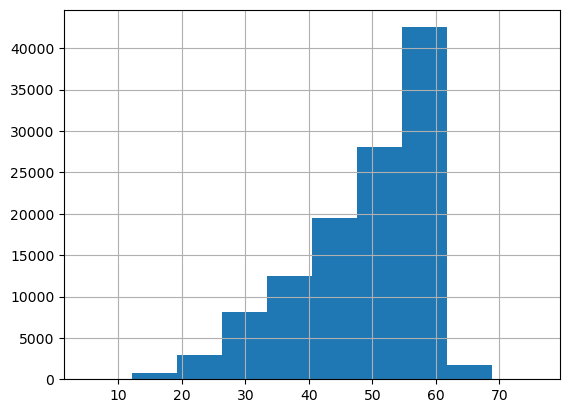

In [148]:
df["product_name_lenght"].hist()



In [149]:
# Aqui estou retornando o valor mais frequente da coluna 'product_name_lenght'

df['product_name_lenght'].mode()[0]

59.0

In [150]:
# PREENCHENDO VALORES AUSENTES NA COLUNA product_name_lenght COM O MODO

df['product_name_lenght'].fillna(df['product_name_lenght'].mode()[0], inplace=True)


<AxesSubplot:>

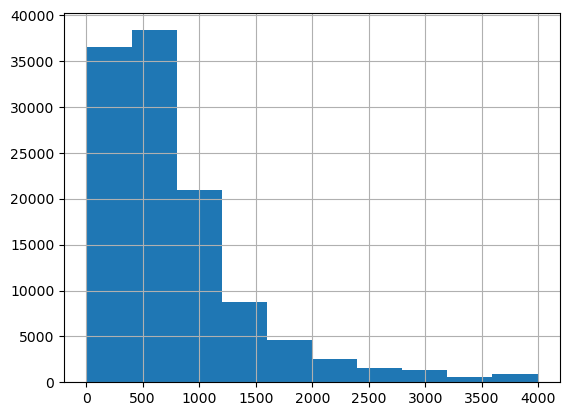

In [151]:
 # PREENCHENDO VALORES AUSENTES NA COLUNA product_description_lenght COM O MODO

df['product_description_lenght'].fillna(df['product_description_lenght'].mode(), inplace=True)

df['product_description_lenght'].hist()


<AxesSubplot:>

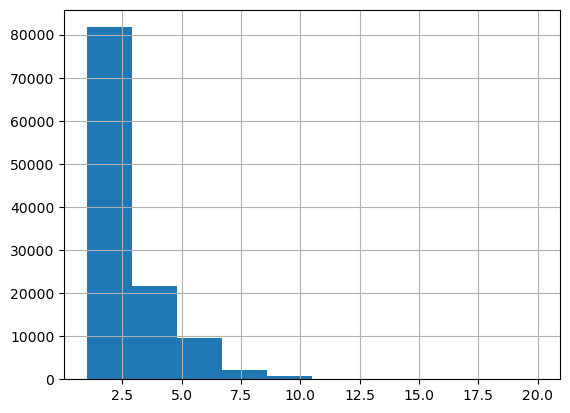

In [152]:
df['product_photos_qty'].hist()

In [153]:
# Aqui estou retornando o valor mais frequente da coluna "products_photos_qty" 
df['product_photos_qty'].mode()[0]

1.0

In [154]:
# Aqui estou retornando a mediana(valor central) da coluna "product_photos_qty",pode ser útil para entender a tendência central dos valores dessa coluna e ter uma noção da distribuição dos dados.

df['product_photos_qty'].median()


1.0

In [156]:
 # PREENCHENDO VALORES AUSENTES DE TODAS AS COLUNAS COM O MODO.

df['product_photos_qty'].fillna(df['product_photos_qty'].mode()[0], inplace=True)
df['product_description_lenght'].fillna(df['product_description_lenght'].mode()[0], inplace=True)
df['product_weight_g'].fillna(df['product_weight_g'].mode()[0], inplace=True)         
df['product_length_cm'].fillna(df['product_length_cm'].mode()[0], inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].mode()[0], inplace=True) 
df['product_width_cm'].fillna(df['product_width_cm'].mode()[0], inplace=True) 
df['product_category_name'].fillna(df['product_category_name'].mode()[0], inplace=True)
del df['product_category_name_english']

In [162]:
# PREENCHE OS VALORES FALTANTES NAS COLUNAS 'review_comment_message' E 'review_comment_title' COM "INDISPONÍVEL"

df['review_comment_message'].fillna(value="indisponível", inplace=True)
df['review_comment_title'].fillna(value="indisponível", inplace=True)

In [165]:
# CONVERTER AS COLUNAS RELACIONADA AO TEMPO, EM UMA ÚNICA COLUNA E ADICIONAR AO DATAFRAME.
# converte as colunas especificadas em 'df' para o formato de data e hora

columns_to_convert = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_datetime)


In [168]:
# REMOVENDO TODAS AS DATAS NULAS

df.dropna(inplace=True)

In [169]:
# Utilizando a função isnull podemos verificar todos os valores das colunas do df
df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state      